In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
from folium import plugins
from datetime import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import bokeh
import geopandas as gpd
import pandas_bokeh
from pyproj import Proj
import math
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8');

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.shape

(99441, 5)

In [3]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
geolocation.shape

(1000163, 5)

In [4]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.shape

(3095, 4)

In [5]:
parse = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=parse, index_col='order_purchase_timestamp')
orders.shape


(99441, 7)

In [6]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.shape

(100000, 7)

In [7]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_payments.shape

(103886, 5)

In [8]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.shape

(112650, 7)

In [9]:
products = pd.read_csv('olist_products_dataset.csv')
products.shape

(32951, 9)

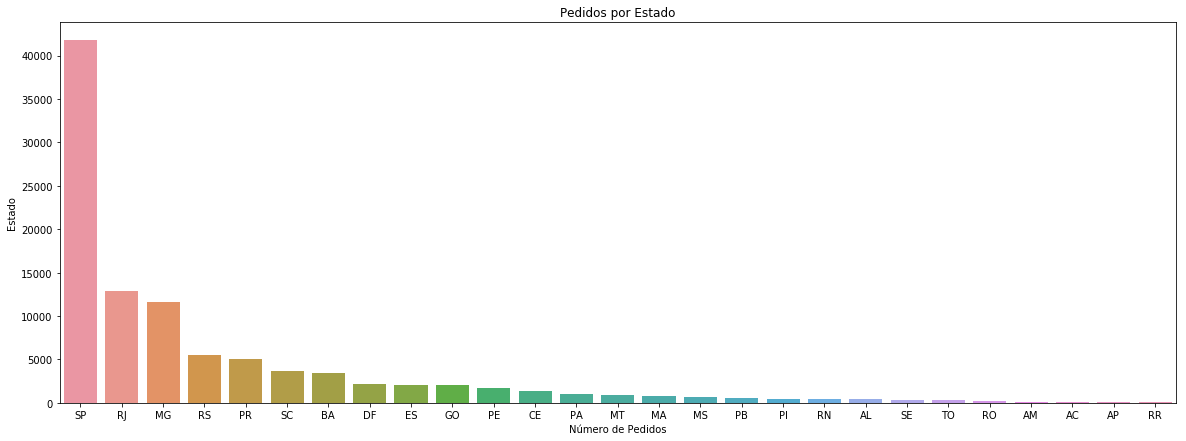

In [10]:
state_order=customers['customer_state'].value_counts().index
plt.figure(figsize=(20,7))
sns.countplot(x='customer_state', data=customers, order=state_order)
plt.title('Pedidos por Estado')
plt.ylabel('Estado')
plt.xlabel('Número de Pedidos');

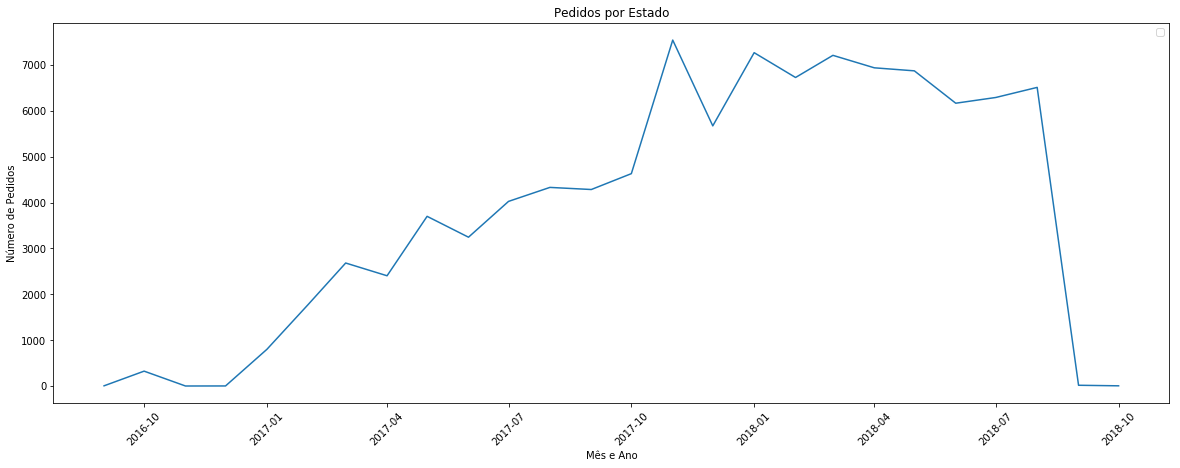

In [11]:
df = orders.resample('MS')['order_id'].count().to_frame()
plt.figure(figsize=(20,7))
sns.lineplot(data=df)
plt.xticks(rotation='45')
plt.legend('')
plt.title('Pedidos por Estado')
plt.ylabel('Número de Pedidos')
plt.xlabel('Mês e Ano');

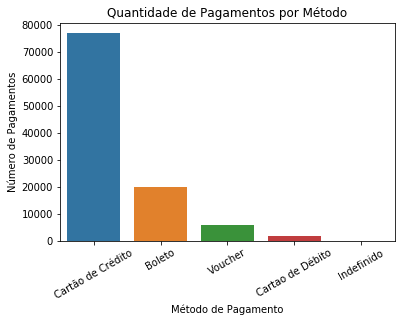

In [12]:
#Traduzir x-ticks
sns.countplot(order_payments['payment_type'])
plt.title('Quantidade de Pagamentos por Método')
plt.xticks(np.arange(5),labels=['Cartão de Crédito','Boleto', 'Voucher','Cartao de Débito','Indefinido'], rotation=30)
plt.ylabel('Número de Pagamentos')
plt.xlabel('Método de Pagamento');

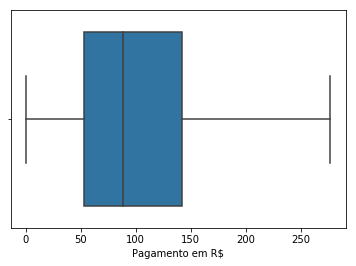

In [13]:
sns.boxplot(order_payments[order_payments['payment_value']<277]['payment_value'])
plt.xlabel('Pagamento em R$');

In [14]:
grouped = order_payments.sort_values(['order_id','payment_sequential'], ascending=False).groupby('order_id').agg('first')
grouped.reset_index(inplace=True)

In [15]:
grouped['Parcelado'] = grouped['payment_installments'].apply(lambda x: 'À Vista' if(x<=1) else 'À Prazo')
grouped['installments_simples'] = grouped['payment_installments'].apply(lambda x: 'Até 2x' if(x<=2) else 'Mais de 2x')
pay_score = grouped

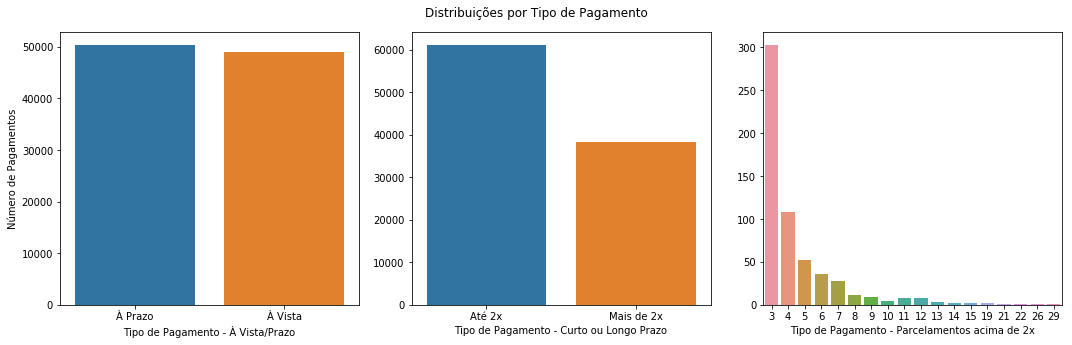

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(grouped['Parcelado'], ax=ax1)
sns.countplot(grouped['installments_simples'], ax=ax2)
sns.countplot(grouped[grouped['payment_sequential']>2]['payment_sequential'], ax=ax3);

ax1.set_ylabel('Número de Pagamentos') 
ax2.set_ylabel('') 
ax3.set_ylabel('') 

ax1.set_xlabel('Tipo de Pagamento - À Vista/Prazo')
ax2.set_xlabel('Tipo de Pagamento - Curto ou Longo Prazo')
ax3.set_xlabel('Tipo de Pagamento - Parcelamentos acima de 2x')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribuições por Tipo de Pagamento");

In [17]:
dict_categories = {
    'cama_mesa_banho':'Cama, Mesa, Banho e Conforto',
    'esporte_lazer': 'Esporte e Lazer',
    'moveis_decoracao':'Móveis e Decoração',
    'beleza_saude':'Beleza, Perfumaria e Saúde',
    'utilidades_domesticas':'Utilidades Domésticas', 
    'automotivo':'Automotivo', 
    'informatica_acessorios':'PCs, Informática, Eletrônicos e Acessórios',
    'brinquedos':'Brinquedos', 
    'relogios_presentes':'Relógios e Presentes', 
    'telefonia':'Telefonia', 
    'bebes':'Bebês', 
    'perfumaria':'Beleza, Perfumaria e Saúde',
    'papelaria':'Papelaria', 
    'fashion_bolsas_e_acessorios':'Moda', 
    'cool_stuff':'Produtos Variados',
    'ferramentas_jardim':'Jardinagem', 
    'pet_shop':'Pet Shop', 
    'Sem Categoria':'Sem Categoria', 
    'eletronicos':'PCs, Informática, Eletrônicos e Acessórios',
    'construcao_ferramentas_construcao':'Construção', 
    'eletrodomesticos':'Eletrodomésticos e Eletroportáteis',
    'malas_acessorios':'Malas e Acessórios', 
    'consoles_games':'Consoles, Games e Acessórios', 
    'moveis_escritorio':'Móveis e Decoração',
    'instrumentos_musicais':'Música, Áudio, Intrumentos Musicais', 
    'eletroportateis':'Eletrodomésticos e Eletroportáteis', 
    'casa_construcao':'Construção',
    'livros_interesse_geral':'Livros', 
    'fashion_calcados':'Moda', 
    'moveis_sala':'Móveis e Decoração',
    'climatizacao':'Climatização', 
    'livros_tecnicos':'Livros', 
    'telefonia_fixa':'Telefonia', 
    'casa_conforto':'Cama, Mesa, Banho e Conforto',
    'market_place':'Marketplace', 
    'alimentos_bebidas':'Alimentos e Bebidas',
    'fashion_roupa_masculina':'Moda',
    'moveis_cozinha_area_de_servico_jantar_e_jardim':'Móveis e Decoração',
    'sinalizacao_e_seguranca':'Sinalização e Segurança', 
    'construcao_ferramentas_seguranca':'Construção',
    'eletrodomesticos_2':'Eletrodomésticos e Eletroportáteis', 
    'construcao_ferramentas_jardim':'Construção', 
    'alimentos':'Alimentos e Bebidas',
    'bebidas':'Alimentos e Bebidas', 
    'construcao_ferramentas_iluminacao':'Construção',
    'agro_industria_e_comercio':'Agro, Indústria, Comércio e Negócios',
    'industria_comercio_e_negocios':'Agro, Indústria, Comércio e Negócios',
    'artigos_de_natal':'Artigos para Festividades', 
    'audio':'Música, Áudio, Intrumentos Musicais', 
    'artes':'Artes e Artesanato',
    'fashion_underwear_e_moda_praia':'Moda',
    'dvds_blu_ray':'CDs, DVDs e Blu-ray', 
    'moveis_quarto':'Móveis e Decoração', 
    'construcao_ferramentas_ferramentas':'Construção',
    'livros_importados':'Livros', 
    'portateis_casa_forno_e_cafe':'Utilidades Domésticas', 
    'pcs':'PCs, Informática, Eletrônicos e Acessórios', 
    'cine_foto':'Cinema e Foto',
    'fashion_roupa_feminina':'Moda',
    'musica':'Música, Áudio, Intrumentos Musicais', 
    'artigos_de_festas':'Artigos para Festividades',
    'artes_e_artesanato':'Artes e Artesanato', 
    'fashion_esporte':'Moda', 
    'flores':'Flores', 
    'fraldas_higiene':'Bebês',
    'portateis_cozinha_e_preparadores_de_alimentos':'Utilidades Domésticas',
    'moveis_colchao_e_estofado':'Móveis e Decoração', 
    'la_cuisine':'Utilidades Domésticas', 
    'tablets_impressao_imagem':'PCs, Informática, Eletrônicos e Acessórios',
    'casa_conforto_2':'Cama, Mesa, Banho e Conforto', 
    'fashion_roupa_infanto_juvenil':'Moda', 
    'pc_gamer':'Consoles, Games e Acessórios',
    'seguros_e_servicos':'Seguros e Serviços', 
    'cds_dvds_musicais':'CDs, DVDs e Blu-ray'
}

In [18]:
products['product_category_name'].fillna('Sem Categoria', inplace=True)

order_item_category = products[['product_id','product_category_name']].merge(order_items[['order_id','product_id']], left_on='product_id', right_on='product_id', how='left')

order_item_category['product_category_name'] = order_item_category['product_category_name'].apply(lambda x: dict_categories[x])

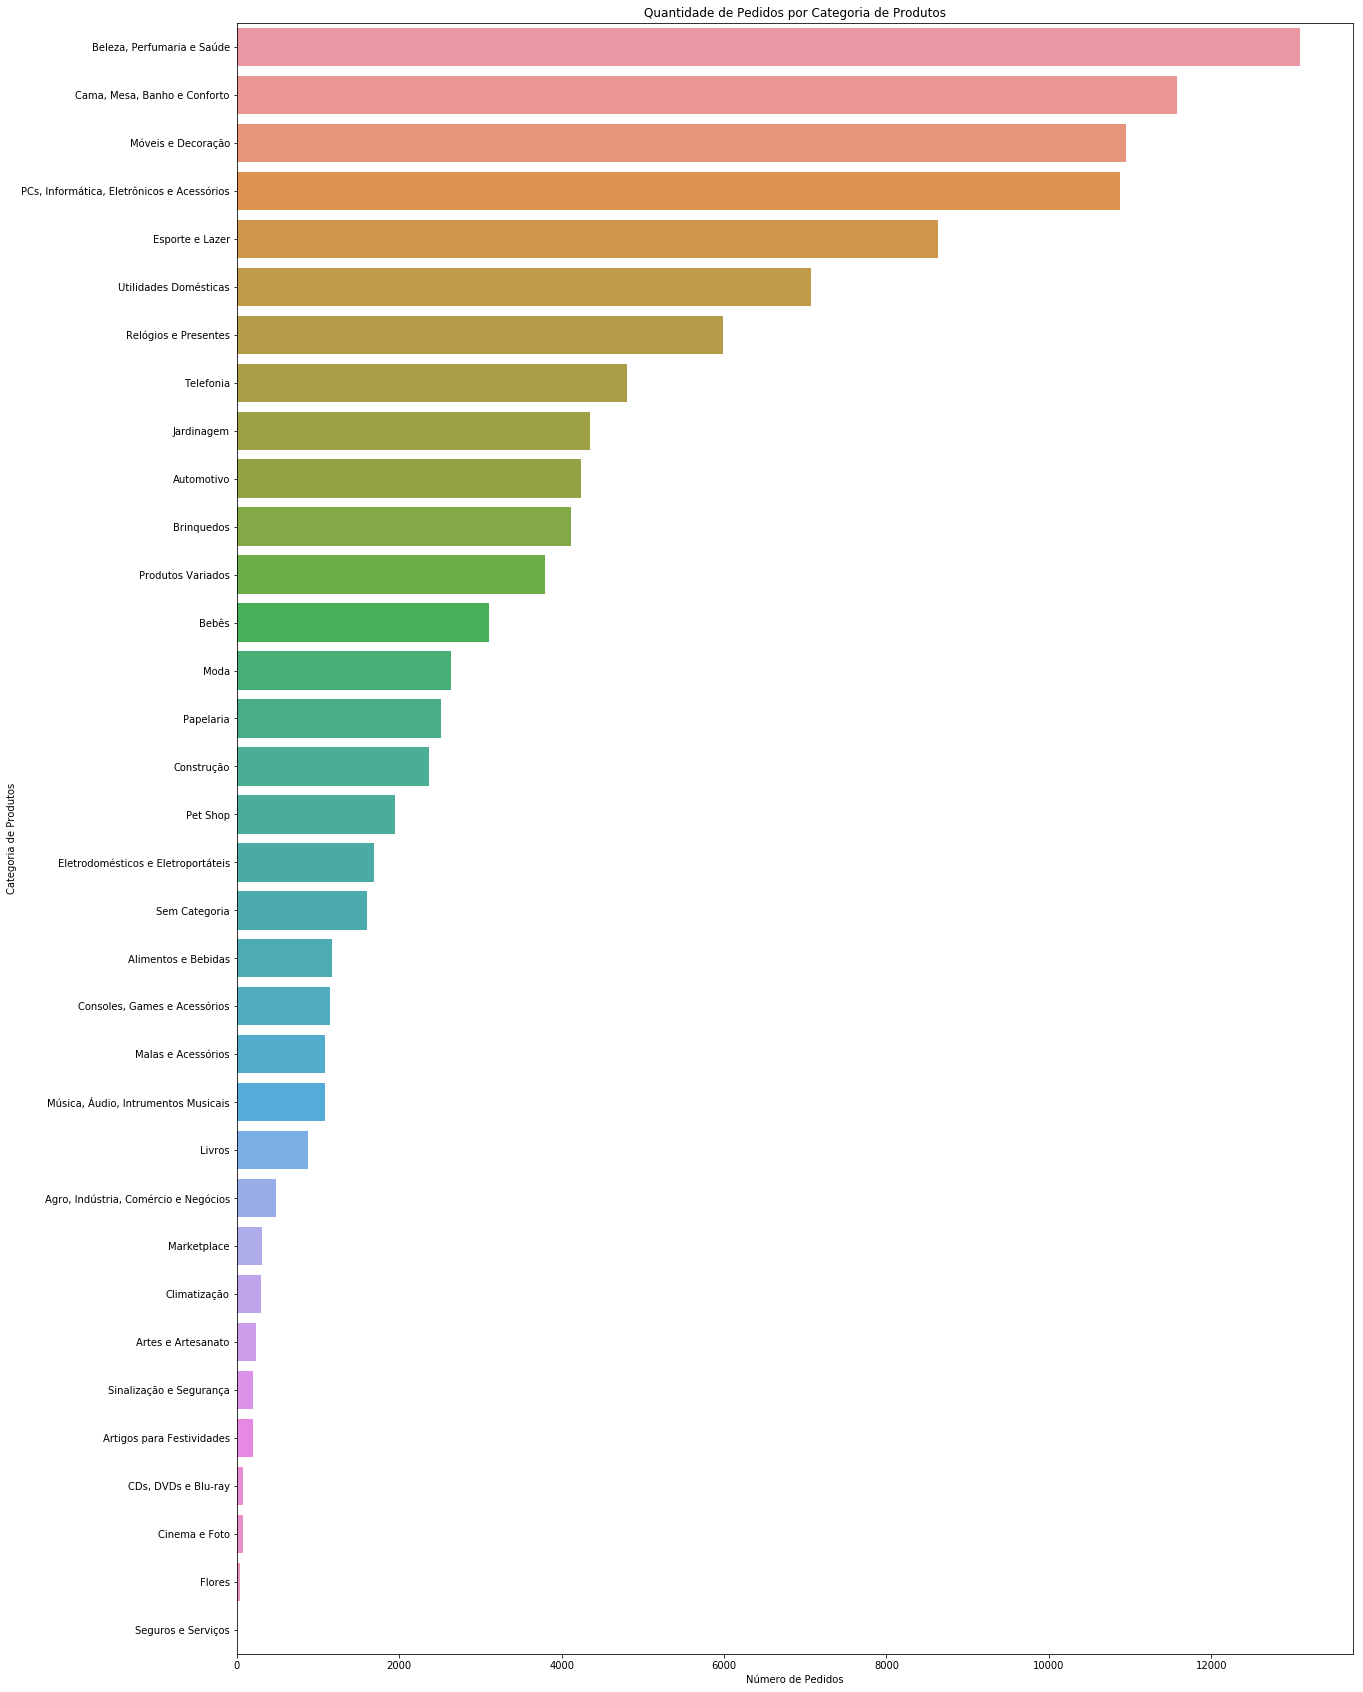

In [19]:
plt.figure(figsize=(20,30))
sns.countplot(y=order_item_category['product_category_name'], order = order_item_category['product_category_name'].value_counts().index)
plt.title('Quantidade de Pedidos por Categoria de Produtos')
plt.ylabel('Categoria de Produtos')
plt.xlabel('Número de Pedidos');

In [20]:
group_orders = order_items.groupby('order_id')[['price','freight_value']].agg('sum')
group_orders = group_orders.merge(orders[['order_id','customer_id']], left_on='order_id', right_on='order_id')
group_orders = group_orders.merge(customers[['customer_id','customer_state']], left_on='customer_id', right_on='customer_id')
orders_loc = group_orders
group_orders['total_price'] = group_orders['price']+group_orders['freight_value']

In [21]:
group_orders = group_orders.groupby('customer_state').agg('mean')
group_orders.reset_index(inplace=True)
group_orders.loc[27] = ['BR', group_orders['price'].mean(), group_orders['freight_value'].mean(), group_orders['total_price'].mean()]

group_orders.loc[group_orders['customer_state'] == 'BR', 'clrs'] = '#228B22'
group_orders.loc[group_orders['customer_state'] != 'BR', 'clrs'] = '#fdfd96'


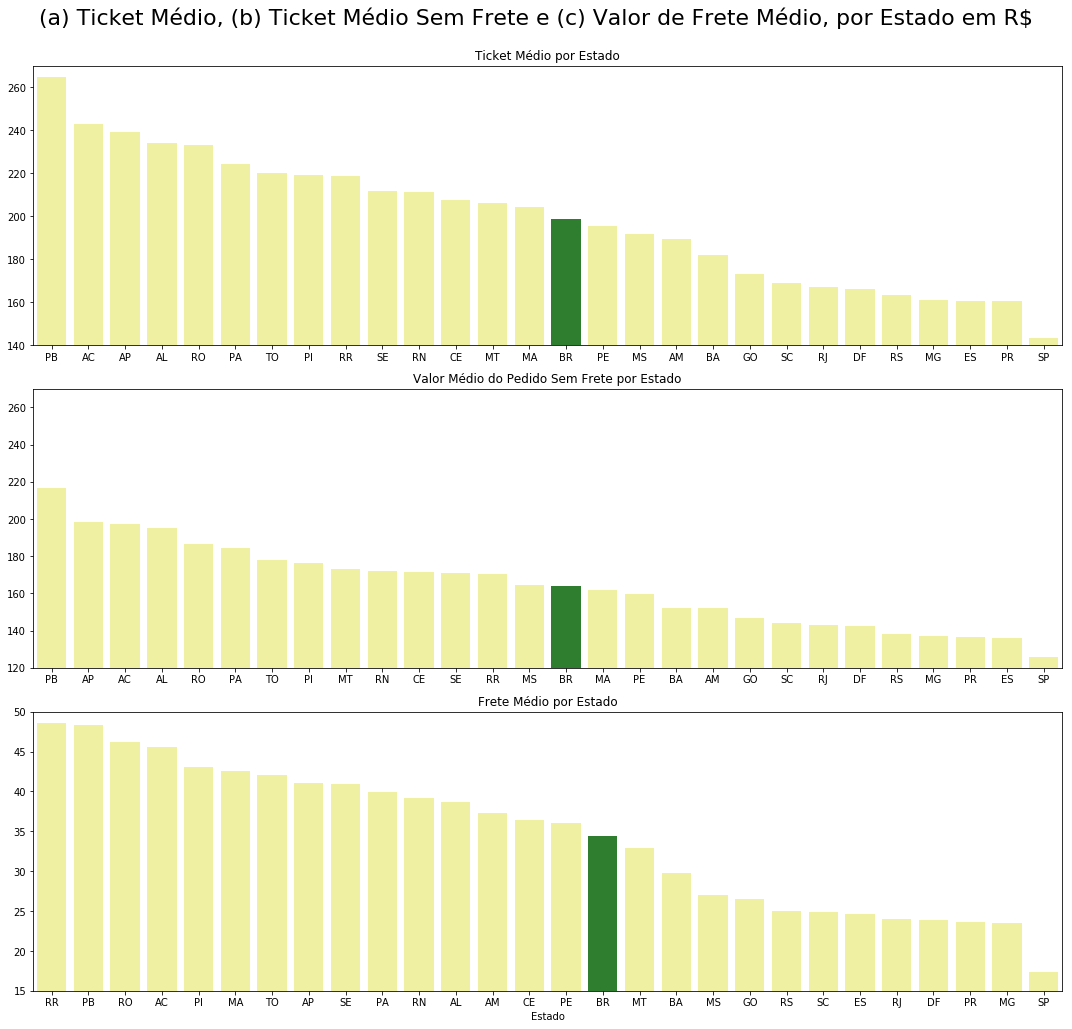

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,15))

ax1.set_title('Ticket Médio por Estado')
sns.barplot(x='customer_state',
            y='total_price',
            data=group_orders,
            palette=group_orders[['customer_state','total_price','clrs']].sort_values(by='total_price',ascending=False)['clrs'],
            order=group_orders[['customer_state','total_price']].sort_values(by='total_price',ascending=False)['customer_state'].values,
            ax=ax1);

ax2.set_title('Valor Médio do Pedido Sem Frete por Estado')
sns.barplot(x='customer_state',
            y='price',
            data=group_orders,
            palette=group_orders[['customer_state','price','clrs']].sort_values(by='price',ascending=False)['clrs'],
            order=group_orders[['customer_state','price']].sort_values(by='price',ascending=False)['customer_state'].values,
            ax=ax2);

ax3.set_title('Frete Médio por Estado')
sns.barplot(x='customer_state',
            y='freight_value',
            data=group_orders,
            palette=group_orders[['customer_state','freight_value','clrs']].sort_values(by='freight_value',ascending=False)['clrs'],
            order=group_orders[['customer_state','freight_value']].sort_values(by='freight_value',ascending=False)['customer_state'].values,
            ax=ax3);

fig.suptitle("(a) Ticket Médio, (b) Ticket Médio Sem Frete e (c) Valor de Frete Médio, por Estado em R$", fontsize=22);

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('Estado')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_ylim(140,270)
ax2.set_ylim(120,270)
ax3.set_ylim(15,50)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [23]:
estados_dic = {
    
    'SP':'SÃO PAULO', 'SC':'SANTA CATARINA', 'MG':'MINAS GERAIS', 'PR':'PARANÁ', 'RJ':'RIO DE JANEIRO', 
    'RS':'RIO GRANDE DO SUL', 'PA':'PARÁ', 'GO':'GOIÁS', 'ES':'ESPIRITO SANTO', 'BA':'BAHIA', 'MA':'MARANHÃO',
       'MS':'MATO GROSSO DO SUL', 'CE':'CEARÁ', 'DF':'DISTRITO FEDERAL', 'RN':'RIO GRANDE DO NORTE',
    'PE':'PERNAMBUCO', 'MT':'MATO GROSSO', 'AM':'AMAZONAS', 'AP':'AMAPÁ', 'AL':'ALAGOAS', 'RO':'RONDÔNIA',
    'PB':'PARAÍBA','TO':'TOCANTINS', 'PI':'PIAUÍ', 'AC':'ACRE', 'SE':'SERGIPE', 'RR':'RORAIMA', 'BR':'Brasil'
}

group_orders['customer_state_full'] = group_orders['customer_state'].apply(lambda x: estados_dic[x])

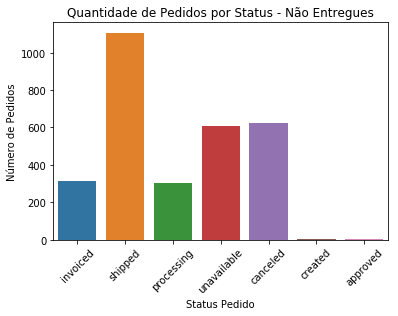

In [24]:
sns.countplot(orders[orders['order_status']!='delivered']['order_status'])
plt.title('Quantidade de Pedidos por Status - Não Entregues')
plt.ylabel('Número de Pedidos')
plt.xlabel('Status Pedido')
plt.xticks(rotation=45);

In [25]:
customer_location = customers[['customer_id','customer_zip_code_prefix']].merge(
    geolocation[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']], 
    left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

customer_location = customer_location.groupby('customer_id')[['geolocation_lat','geolocation_lng']].agg('last')

In [26]:
seller_location = sellers[['seller_id','seller_zip_code_prefix']].merge(
    geolocation[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']], 
    left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

seller_location = seller_location.groupby('seller_id')[['geolocation_lat','geolocation_lng']].agg('last')

In [27]:
heatMap_customers = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)
    
plugins.HeatMap(customer_location,radius=8, blur=15,max_zoom=1).add_to(heatMap_customers)

heatMap_customers.save('heatmap_cust.html')

IFrame('heatmap_cust.html', width='100%', height='500px')

In [28]:
heatMap_sellers = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)
    
plugins.HeatMap(seller_location,radius=8, blur=15,max_zoom=1).add_to(heatMap_sellers)

heatMap_sellers.save('heatmap_sell.html')

IFrame('heatmap_sell.html', width='100%', height='500px')

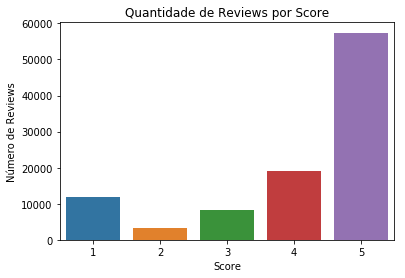

In [29]:
sns.countplot(order_reviews['review_score'])
plt.title('Quantidade de Reviews por Score')
plt.ylabel('Número de Reviews')
plt.xlabel('Score');

In [30]:
orders_loc = orders_loc[['order_id','customer_state']].merge(order_reviews[['order_id','review_score']], left_on='order_id', right_on='order_id')
orders_loc = orders_loc.groupby('customer_state').agg('mean')

In [31]:
orders_loc.reset_index(inplace=True)

orders_loc.loc[27] = ['BR', orders_loc['review_score'].mean()]

orders_loc.loc[orders_loc['customer_state'] == 'BR', 'clrs'] = '#228B22'
orders_loc.loc[orders_loc['customer_state'] != 'BR', 'clrs'] = '#fdfd96'

In [32]:
orders_loc['customer_state_full'] = orders_loc['customer_state'].apply(lambda x: estados_dic[x])

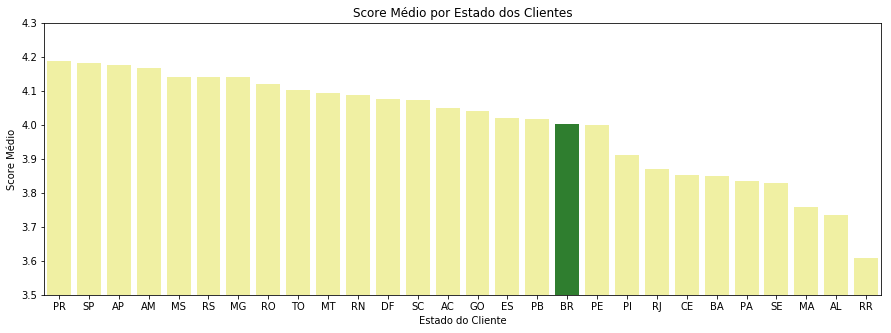

In [33]:
plt.figure(figsize=(15,5))

sns.barplot(x='customer_state',
            y='review_score',
            data=orders_loc,
            palette=orders_loc[['customer_state','review_score','clrs']].sort_values(by='review_score',ascending=False)['clrs'],
            order=orders_loc[['customer_state','review_score']].sort_values(by='review_score',ascending=False)['customer_state'].values)

plt.title('Score Médio por Estado dos Clientes')
plt.xlabel('Estado do Cliente')
plt.ylabel('Score Médio')
plt.ylim(3.5,4.3);

In [34]:
order_seller = order_items.merge(sellers[['seller_id','seller_state']], left_on='seller_id', right_on='seller_id')
order_seller = order_seller[['order_id','seller_state','seller_id']].merge(order_reviews[['order_id','review_score']], left_on='order_id', right_on='order_id')

In [35]:
order_seller = order_seller.groupby('seller_state').agg('mean')
order_seller.reset_index(inplace=True)
order_seller.loc[24] = ['BR', orders_loc['review_score'].mean()]
order_seller.loc[order_seller['seller_state'] == 'BR', 'clrs'] = '#228B22'
order_seller.loc[order_seller['seller_state'] != 'BR', 'clrs'] = '#fdfd96'

In [36]:
order_seller['seller_state_full'] = order_seller['seller_state'].apply(lambda x: estados_dic[x])
order_seller.rename(columns={'review_score':'review_score_seller'}, inplace=True)

In [37]:
group_orders = group_orders.merge(order_seller[['seller_state_full','review_score_seller']], left_on='customer_state_full', right_on='seller_state_full', how='outer')
group_orders = group_orders.merge(orders_loc[['customer_state_full','review_score']], left_on='customer_state_full', right_on='customer_state_full',how='outer')

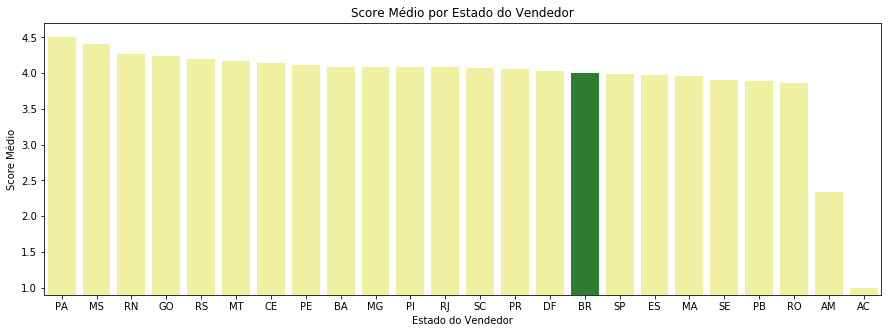

In [38]:
plt.figure(figsize=(15,5))

sns.barplot(x='seller_state',
            y='review_score_seller',
            data=order_seller,
            palette=order_seller[['seller_state','review_score_seller','clrs']].sort_values(by='review_score_seller',ascending=False)['clrs'],
            order=order_seller[['seller_state','review_score_seller']].sort_values(by='review_score_seller',ascending=False)['seller_state'].values)

plt.title('Score Médio por Estado do Vendedor')
plt.xlabel('Estado do Vendedor')
plt.ylabel('Score Médio')
plt.ylim(0.9,4.7);

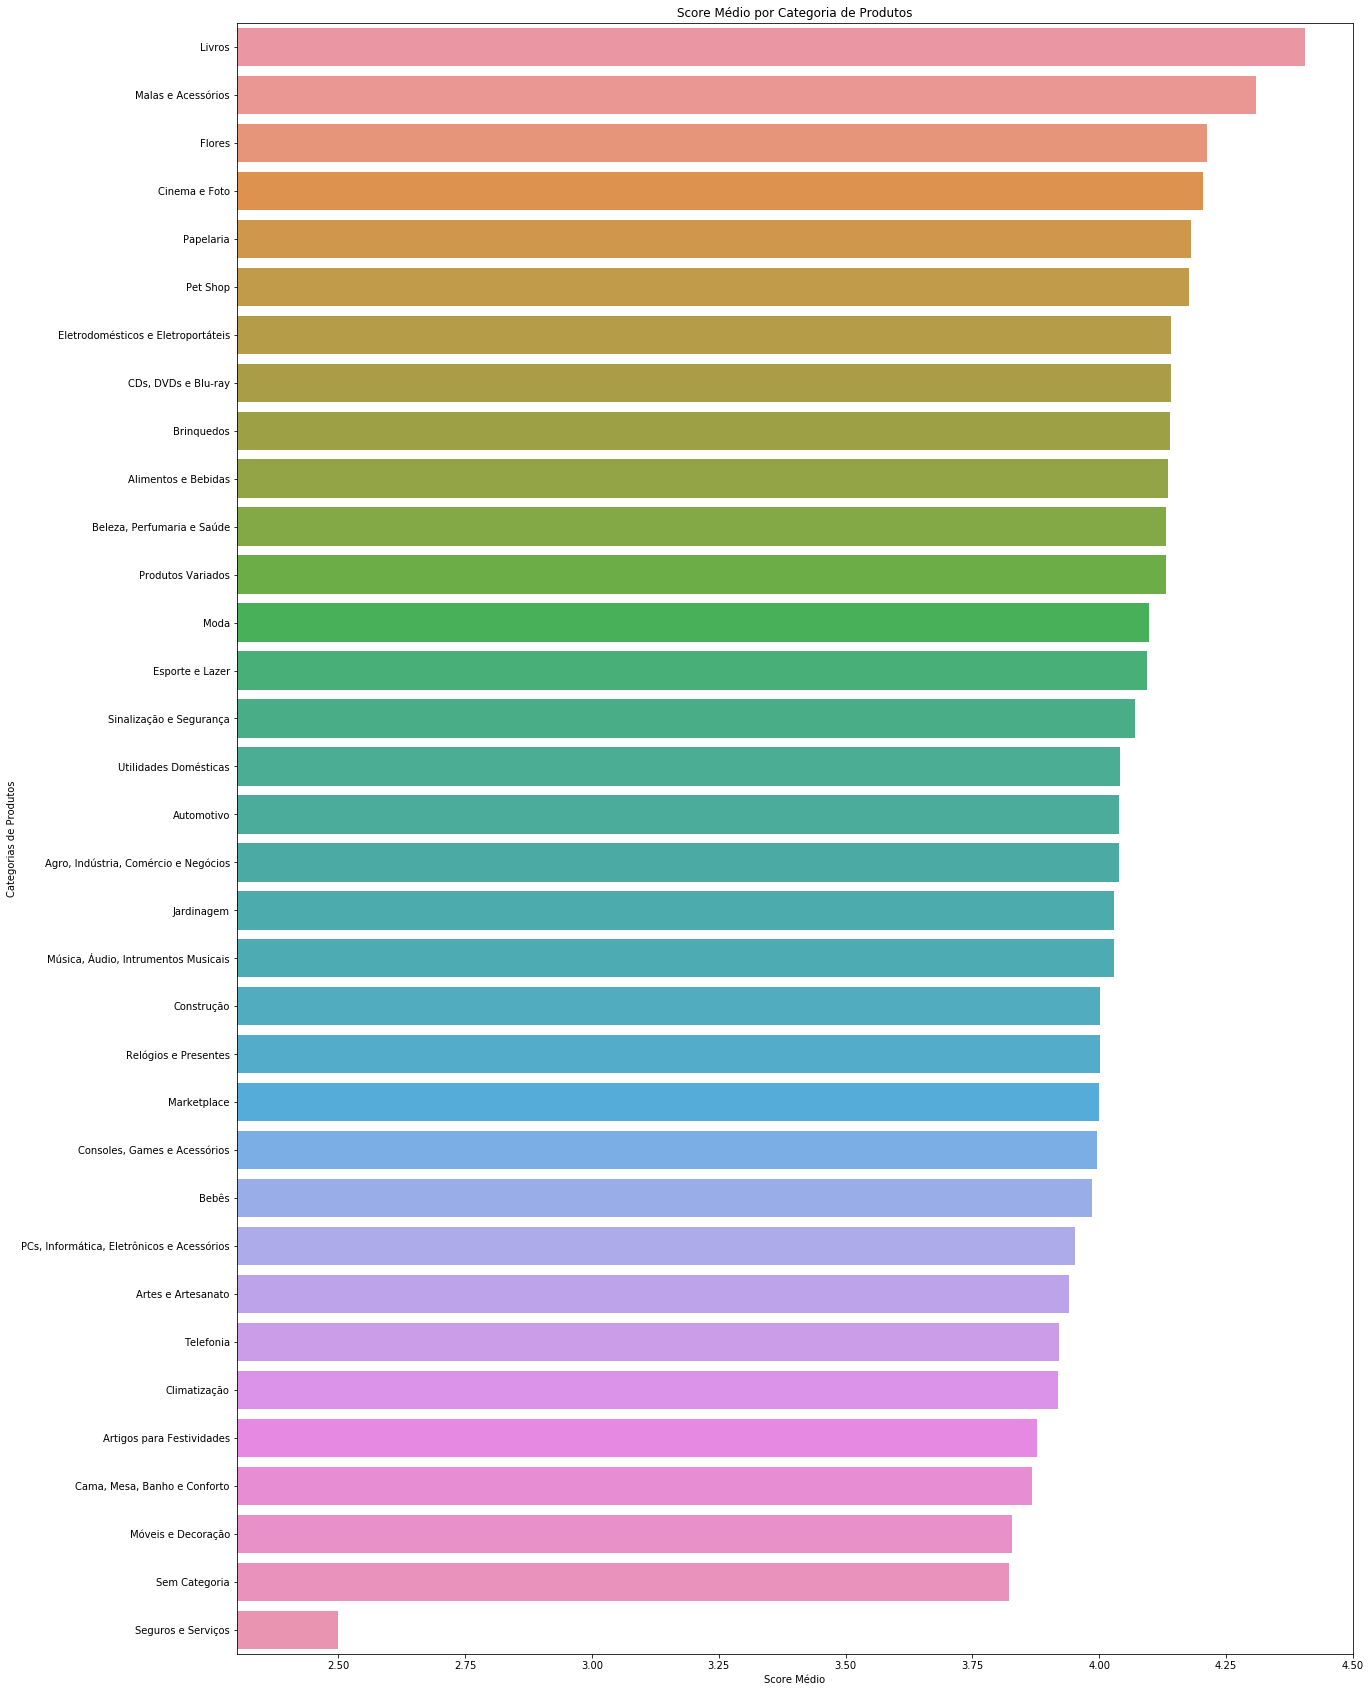

In [39]:
score_category = order_item_category.merge(order_reviews[['order_id','review_score']], left_on='order_id', right_on='order_id')
score_category = score_category.groupby('product_category_name').agg('mean').sort_values('review_score', ascending=False)
plt.figure(figsize=(20,30))
plt.xlim(2.3,4.5)
sns.barplot(data=score_category, x='review_score', y=score_category.index)
plt.title('Score Médio por Categoria de Produtos')
plt.ylabel('Categorias de Produtos')
plt.xlabel('Score Médio');

In [40]:
payments_score = pay_score.merge(order_reviews[['order_id','review_score']], right_on='order_id', left_on='order_id')

payments_score.iloc[10312, payments_score.columns.get_loc('payment_installments')] = 1
payments_score.iloc[45443, payments_score.columns.get_loc('payment_installments')] = 1

payments_score_parcelado = payments_score[['Parcelado','review_score']].groupby('Parcelado').agg('mean')
payments_score_simplesvezes = payments_score[['installments_simples','review_score']].groupby('installments_simples').agg('mean')
payments_score_vezes = payments_score[['payment_installments','review_score']].groupby('payment_installments').agg('mean')

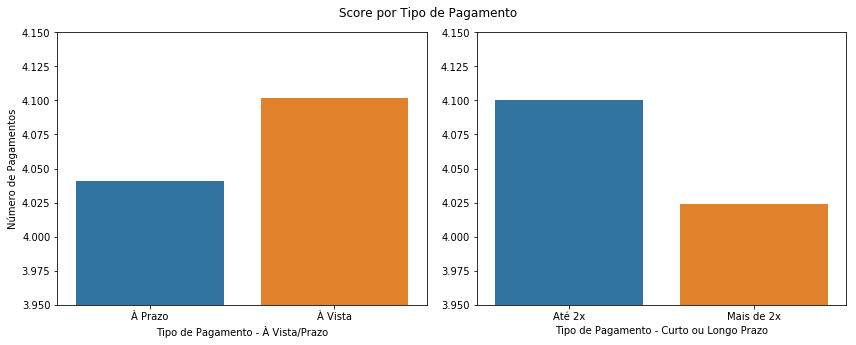

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.barplot(data=payments_score_parcelado, x=payments_score_parcelado.index, y='review_score', ax=ax1)
sns.barplot(data=payments_score_simplesvezes,  x=payments_score_simplesvezes.index, y='review_score', ax=ax2)
           
ax1.set_ylabel('Número de Pagamentos') 
ax2.set_ylabel('') 

ax1.set_ylim(3.95,4.15)
ax2.set_ylim(3.95,4.15)

ax1.set_xlabel('Tipo de Pagamento - À Vista/Prazo')
ax2.set_xlabel('Tipo de Pagamento - Curto ou Longo Prazo')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Score por Tipo de Pagamento");

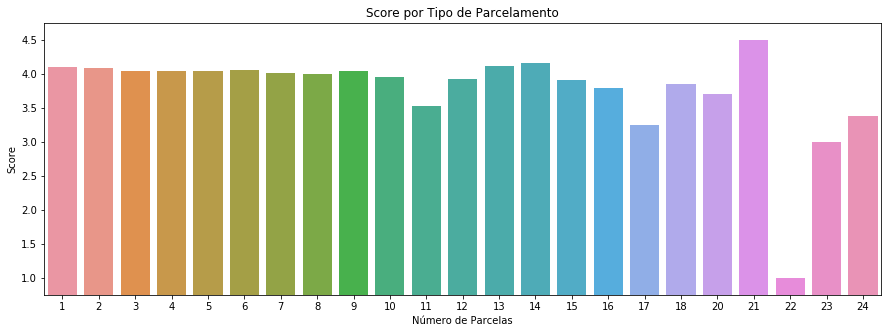

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(data=payments_score_vezes,  x=payments_score_vezes.index, y='review_score')
plt.title('Score por Tipo de Parcelamento')
plt.ylabel('Score')
plt.xlabel('Número de Parcelas')
plt.ylim(0.75,4.75);

In [43]:
review_status = orders[['order_id','order_status']].merge(order_reviews[['order_id','review_score']], right_on='order_id', left_on='order_id')
review_status = review_status.groupby('order_status').agg('mean')

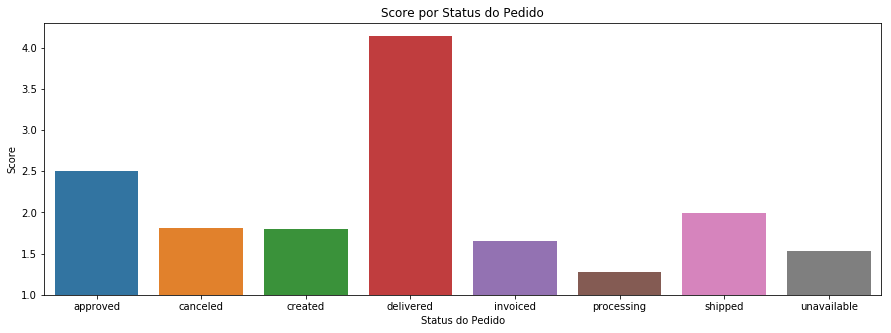

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(data=review_status,  x=review_status.index, y='review_score')
plt.title('Score por Status do Pedido')
plt.ylabel('Score')
plt.xlabel('Status do Pedido')
plt.ylim(1,4.3);

In [46]:
estados = gpd.read_file('Brasil/UFEBRASIL.shp') 
estados.set_index('NM_ESTADO', inplace=True)

In [47]:
customers_state = customers[['customer_id','customer_state']]
sellers_state = sellers[['seller_id', 'seller_state']]

In [48]:
customers_state = customers_state['customer_state'].apply(lambda x: estados_dic[x])
customers_state = customers_state.value_counts().to_frame()

In [49]:
sellers_state = sellers_state['seller_state'].apply(lambda x: estados_dic[x])
sellers_state = sellers_state.value_counts().to_frame()

In [50]:
estados['count_clientes'] = customers_state['customer_state']
estados['count_seller'] = sellers_state['seller_state']

In [51]:
group_orders = group_orders.merge(estados[['count_clientes','count_seller']],left_on='customer_state_full',right_on=estados.index, how='outer')

In [52]:
group_orders.to_csv('valores_estado.csv')

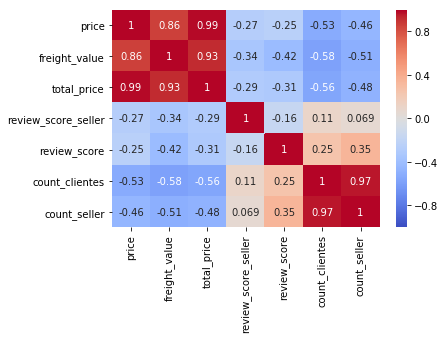

In [53]:
sns.heatmap(group_orders.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [54]:
%%html
<div class='tableauPlaceholder' id='viz1566326061994' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;GrficosporUF&#47;GrficosporUF&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GrficosporUF&#47;GrficosporUF' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;GrficosporUF&#47;GrficosporUF&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1566326061994');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [60]:
parse = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=parse)
orders.shape

(99441, 8)

In [61]:
orders = orders.merge(order_payments.groupby('order_id').agg('sum')['payment_value'], left_on='order_id', right_on='order_id')

In [62]:
orders = orders.merge(customers[['customer_id','customer_state']], left_on='customer_id', right_on='customer_id')

In [64]:
orders['time_to_approval_delta'] = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders['time_to_approval_min'] = orders['time_to_approval_delta'].apply(lambda x: x.total_seconds()/60)
orders['time_to_approval_hour'] = orders['time_to_approval_delta'].apply(lambda x: x.total_seconds()/3600)
orders['time_to_approval_day'] = orders['time_to_approval_delta'].apply(lambda x: x.total_seconds()/86400)

approval = orders[['order_id', 'customer_state', 'order_approved_at','time_to_approval_delta','time_to_approval_min', 'time_to_approval_hour','time_to_approval_day']]

In [65]:
orders['time_to_carrier_delta'] = orders['order_delivered_carrier_date'] - orders['order_approved_at'] 
orders['time_to_carrier_min'] = orders['time_to_carrier_delta'].apply(lambda x: x.total_seconds()/60)
orders['time_to_carrier_hour'] = orders['time_to_carrier_delta'].apply(lambda x: x.total_seconds()/3600)
orders['time_to_carrier_day'] = orders['time_to_carrier_delta'].apply(lambda x: x.total_seconds()/86400)

carrier = orders[['order_id', 'customer_state', 'order_approved_at','order_delivered_carrier_date','time_to_carrier_delta','time_to_carrier_min', 'time_to_carrier_hour','time_to_carrier_day']]

In [66]:
orders['time_to_deliver_delta'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date'] 
orders['time_to_deliver_min'] = orders['time_to_deliver_delta'].apply(lambda x: x.total_seconds()/60)
orders['time_to_deliver_hour'] = orders['time_to_deliver_delta'].apply(lambda x: x.total_seconds()/3600)
orders['time_to_deliver_day'] = orders['time_to_deliver_delta'].apply(lambda x: x.total_seconds()/86400)

deliver = orders[['order_id', 'customer_state', 'order_delivered_carrier_date','order_delivered_carrier_date','time_to_deliver_delta','time_to_carrier_min', 'time_to_deliver_hour','time_to_deliver_day']]

In [67]:
orders['time_to_deliver_expected_delta'] = orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'] 
orders['time_to_deliver_expected_min'] = orders['time_to_deliver_expected_delta'].apply(lambda x: x.total_seconds()/60)
orders['time_to_deliver_expected_hour'] = orders['time_to_deliver_expected_delta'].apply(lambda x: x.total_seconds()/3600)
orders['time_to_deliver_expected_day'] = orders['time_to_deliver_expected_delta'].apply(lambda x: x.total_seconds()/86400)

expected_deliver =  orders[['order_id', 'customer_state', 'order_estimated_delivery_date', 'order_delivered_customer_date','time_to_deliver_expected_delta', 'time_to_deliver_expected_min','time_to_deliver_expected_hour', 'time_to_deliver_expected_day','payment_value']]

In [68]:
approval.describe()

,time_to_approval_delta,time_to_approval_min,time_to_approval_hour,time_to_approval_day
count,99280,99280.000000,99280.000000,99280.000000
mean,0 days 10:25:09.117294,625.151955,10.419199,0.434133
std,1 days 02:02:17.209594,1562.286827,26.038114,1.084921
min,0 days 00:00:00,0.000000,0.000000,0.000000
25%,0 days 00:12:54,12.900000,0.215000,0.008958
50%,0 days 00:20:36,20.600000,0.343333,0.014306
75%,0 days 14:34:51.250000,874.854167,14.580903,0.607538
max,187 days 21:10:50,270550.833333,4509.180556,187.882523


In [69]:
carrier.describe()

,time_to_carrier_delta,time_to_carrier_min,time_to_carrier_hour,time_to_carrier_day
count,97643,97643.000000,97643.000000,97643.000000
mean,2 days 19:18:30.702108,4038.511702,67.308528,2.804522
std,3 days 13:05:55.273835,5105.921231,85.098687,3.545779
min,-172 days +18:44:38,-246555.366667,-4109.256111,-171.219005
25%,0 days 21:00:43,1260.716667,21.011944,0.875498
50%,1 days 19:38:24,2618.400000,43.640000,1.818333
75%,3 days 13:55:50,5155.833333,85.930556,3.580440
max,125 days 18:18:06,181098.100000,3018.301667,125.762569


In [70]:
deliver.describe()

,time_to_deliver_delta,time_to_carrier_min,time_to_deliver_hour,time_to_deliver_day
count,96474,97643.000000,96474.000000,96474.000000
mean,9 days 07:56:06.170149,4038.511702,223.935047,9.330627
std,8 days 18:14:35.396369,5105.921231,210.243166,8.760132
min,-17 days +21:41:31,-246555.366667,-386.308056,-16.096169
25%,4 days 02:24:09.750000,1260.716667,98.402708,4.100113
50%,7 days 02:23:40,2618.400000,170.394444,7.099769
75%,12 days 00:41:58.250000,5155.833333,288.699514,12.029146
max,205 days 04:35:00,181098.100000,4924.583333,205.190972


In [71]:
expected_deliver.describe()

,time_to_deliver_expected_delta,time_to_deliver_expected_min,time_to_deliver_expected_hour,time_to_deliver_expected_day,payment_value
count,96475,96475.000000,96475.000000,96475.000000,99440.000000
mean,11 days 04:18:38.500596,16098.641677,268.310695,11.179612,160.990267
std,10 days 04:26:25.534541,14666.425576,244.440426,10.185018,221.951257
min,-189 days +00:35:53,-272124.116667,-4535.401944,-188.975081,0.000000
25%,6 days 09:21:47,9201.783333,153.363056,6.390127,62.010000
50%,11 days 22:46:30,17206.500000,286.775000,11.948958,105.290000
75%,16 days 05:51:55.500000,23391.925000,389.865417,16.244392,176.970000
max,146 days 00:23:13,210263.216667,3504.386944,146.016123,13664.080000


In [72]:
expected_deliver['atraso'] = expected_deliver['time_to_deliver_expected_day'].apply(lambda x: 1 if x < 0 else 0)

In [73]:
expected_deliver[expected_deliver['atraso']==0].describe()

,time_to_deliver_expected_delta,time_to_deliver_expected_min,time_to_deliver_expected_hour,time_to_deliver_expected_day,payment_value,atraso
count,88649,88649.000000,88649.000000,88649.000000,91614.000000,91614.0
mean,13 days 00:13:43.452650,18733.724211,312.228737,13.009531,159.988443,0.0
std,7 days 09:04:26.697828,10624.444964,177.074083,7.378087,220.605057,0.0
min,0 days 00:00:05,0.083333,0.001389,0.000058,0.000000,0.0
25%,7 days 23:55:44,11515.733333,191.928889,7.997037,61.750000,0.0
50%,12 days 07:37:52,17737.866667,295.631111,12.317963,104.830000,0.0
75%,17 days 00:54:27,24534.450000,408.907500,17.037813,176.045000,0.0
max,146 days 00:23:13,210263.216667,3504.386944,146.016123,13664.080000,0.0


In [74]:
expected_deliver[expected_deliver['atraso']==1].describe()

,time_to_deliver_expected_delta,time_to_deliver_expected_min,time_to_deliver_expected_hour,time_to_deliver_expected_day,payment_value,atraso
count,7826,7826.000000,7826.000000,7826.000000,7826.000000,7826.0
mean,-10 days +10:49:44.959238,-13750.250679,-229.170845,-9.548785,172.717976,1.0
std,13 days 22:47:00.220184,20087.003670,334.783394,13.949308,236.842676,0.0
min,-189 days +00:35:53,-272124.116667,-4535.401944,-188.975081,14.290000,1.0
25%,-12 days +04:17:47.500000,-17022.208333,-283.703472,-11.820978,66.342500,1.0
50%,-6 days +04:38:40,-8361.333333,-139.355556,-5.806481,112.235000,1.0
75%,-2 days +03:11:15.750000,-2688.737500,-44.812292,-1.867179,188.165000,1.0
max,-1 days +23:56:24,-3.600000,-0.060000,-0.002500,6922.210000,1.0


In [86]:
expected_deliver[(expected_deliver['atraso']==1)&(expected_deliver['customer_state']=='SP')].describe()

,time_to_deliver_expected_delta,time_to_deliver_expected_min,time_to_deliver_expected_hour,time_to_deliver_expected_day,payment_value,atraso
count,2386,2386.000000,2386.000000,2386.000000,2386.000000,2386.0
mean,-8 days +23:37:36.043587,-10102.399274,-168.373321,-7.015555,161.347171,1.0
std,12 days 05:07:33.452906,17587.557548,293.125959,12.213582,232.601917,0.0
min,-176 days +03:08:29,-253251.516667,-4220.858611,-175.869109,14.290000,1.0
25%,-8 days +04:20:43,-11259.283333,-187.654722,-7.818947,57.980000,1.0
50%,-4 days +04:59:02.500000,-5460.958333,-91.015972,-3.792332,102.205000,1.0
75%,-2 days +21:57:56.250000,-1562.062500,-26.034375,-1.084766,172.407500,1.0
max,-1 days +23:56:24,-3.600000,-0.060000,-0.002500,2681.290000,1.0


In [98]:
expected_deliver[(expected_deliver['atraso']==1)&(expected_deliver['customer_state']=='RR')].describe()

,time_to_deliver_expected_delta,time_to_deliver_expected_min,time_to_deliver_expected_hour,time_to_deliver_expected_day,payment_value,atraso
count,5,5.000000,5.000000,5.000000,5.000000,5.0
mean,-38 days +21:51:03.600000,-53408.940000,-890.149000,-37.089542,290.878000,1.0
std,54 days 08:44:11.997048,78284.199951,1304.736666,54.364028,255.144851,0.0
min,-133 days +05:35:14,-191184.766667,-3186.412778,-132.767199,112.430000,1.0
25%,-30 days +04:21:26,-42938.566667,-715.642778,-29.818449,116.920000,1.0
50%,-11 days +22:25:38,-14494.366667,-241.572778,-10.065532,227.240000,1.0
75%,-7 days +02:25:47,-9934.216667,-165.570278,-6.898762,266.850000,1.0
max,-6 days +02:27:13,-8492.783333,-141.546389,-5.897766,730.950000,1.0


In [97]:
expected_deliver[(expected_deliver['atraso']==1)&(expected_deliver['customer_state']=='RJ')].describe()

,time_to_deliver_expected_delta,time_to_deliver_expected_min,time_to_deliver_expected_hour,time_to_deliver_expected_day,payment_value,atraso
count,1664,1664.000000,1664.000000,1664.000000,1664.000000,1664.0
mean,-13 days +03:37:52.996394,-18502.116727,-308.368612,-12.848692,167.700475,1.0
std,13 days 22:08:02.433202,20048.040553,334.134009,13.922250,206.999565,0.0
min,-189 days +00:35:53,-272124.116667,-4535.401944,-188.975081,17.640000,1.0
25%,-18 days +08:54:47.500000,-25385.208333,-423.086806,-17.628617,67.545000,1.0
50%,-9 days +05:21:50.500000,-12638.158333,-210.635972,-8.776499,116.940000,1.0
75%,-4 days +06:37:51.500000,-5362.141667,-89.369028,-3.723709,191.782500,1.0
max,-1 days +23:54:46,-5.233333,-0.087222,-0.003634,2751.240000,1.0


7826
8.0 % de pedidos entregues atrasados


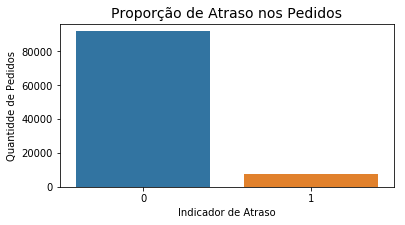

In [143]:
plt.figure(figsize=(6,3))

sns.countplot(data=expected_deliver, x='atraso')

plt.xlabel('Indicador de Atraso')
plt.ylabel('Quantidde de Pedidos')
plt.title('Proporção de Atraso nos Pedidos', fontsize=14)

print(expected_deliver['atraso'].value_counts()[1])
print(round(expected_deliver['atraso'].value_counts()/len(expected_deliver),2)[1]*100,'% de pedidos entregues atrasados')

In [76]:
impacto_fin = round(expected_deliver.groupby('atraso')['payment_value'].sum(),2).to_frame()

Impacto financeiro:  R$ 1.351.690,88


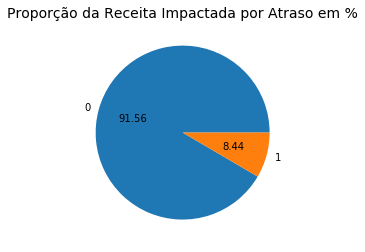

In [142]:
impacto_fin['payment_value'].plot(kind='pie',autopct='%.2f')
#plt.xlabel('% Impacto Financeiro')
plt.ylabel('')
plt.title('Proporção da Receita Impactada por Atraso em %', fontsize=14);
 
print('Impacto financeiro: ',locale.currency(impacto_fin['payment_value'][1], grouping=True))


In [99]:
order_seller_locations = order_items.merge(sellers[['seller_id','seller_state']], left_on='seller_id', right_on='seller_id')


In [102]:
order_seller_locations['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
73c8ab38f07dc94389065f7eba4f297a    14
9bdc4d4c71aa1de4606060929dee888c    14
37ee401157a3a0b28c9c6d0ed8c3b24b    13
2c2a19b5703863c908512d135aa6accc    12
af822dacd6f5cff7376413c03a388bb7    12
637617b3ffe9e2f7a2411243829226d0    12
3a213fcdfe7d98be74ea0dc05a8b31ae    12
c05d6a79e55da72ca780ce90364abed9    12
7f2c22c54cbae55091a09a9653fd2b8a    11
5a3b1c29a49756e75f1ef513383c0c12    11
71dab1155600756af6de79de92e712e3    11
6c355e2913545fa6f72c40cbca57729e    11
9aec4e1ae90b23c7bf2d2b3bfafbd943    10
f80549a97eb203e1566e026ab66f045b    10
ca3625898fbd48669d50701aba51cd5f    10
f60ce04ff8060152c83c7c97e246d6a8    10
30bdf3d824d824610a49887486debcaf    10
9f5054bd9a3c71702aa0917a7da29193    10
e8fa22c3673b1dd17ea315021b1f0f61    10
a483ffe0ce133740ab12ebcba8a3ccf9    10
f5aa338a071dcf7d23d8e6b11

In [109]:


seller_state_dummies = pd.get_dummies(order_seller_locations['seller_state'], prefix='seller_state', drop_first=True)
order_seller_locations = pd.concat([order_seller_locations, seller_state_dummies], axis=1, sort=False)
# agg_customer.drop(columns='group_code', inplace=True)


In [113]:
order_seller_locations[order_seller_locations['order_id']=='848b0561d4bc26f57b288a5004f38683']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_state,seller_state_AM,seller_state_BA,...,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP
33776,848b0561d4bc26f57b288a5004f38683,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2017-12-01 19:19:02,149.99,67.57,MG,0,0,...,0,0,0,0,0,0,0,0,0,0
33777,848b0561d4bc26f57b288a5004f38683,3,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2017-12-01 19:19:02,149.99,67.57,MG,0,0,...,0,0,0,0,0,0,0,0,0,0
45370,848b0561d4bc26f57b288a5004f38683,1,1b7ce992a80ac036dd9ab73d08289712,582d4f8675b945722eda7c0cb61ba4c7,2017-12-01 19:19:02,25.50,2.79,SP,0,0,...,0,0,0,0,0,0,0,0,0,1
45371,848b0561d4bc26f57b288a5004f38683,4,1b7ce992a80ac036dd9ab73d08289712,582d4f8675b945722eda7c0cb61ba4c7,2017-12-01 19:19:02,25.50,2.79,SP,0,0,...,0,0,0,0,0,0,0,0,0,1
45372,848b0561d4bc26f57b288a5004f38683,5,1b7ce992a80ac036dd9ab73d08289712,582d4f8675b945722eda7c0cb61ba4c7,2017-12-01 19:19:02,25.50,2.79,SP,0,0,...,0,0,0,0,0,0,0,0,0,1
45373,848b0561d4bc26f57b288a5004f38683,6,1b7ce992a80ac036dd9ab73d08289712,582d4f8675b945722eda7c0cb61ba4c7,2017-12-01 19:19:02,25.50,2.79,SP,0,0,...,0,0,0,0,0,0,0,0,0,1
45374,848b0561d4bc26f57b288a5004f38683,7,1b7ce992a80ac036dd9ab73d08289712,582d4f8675b945722eda7c0cb61ba4c7,2017-12-01 19:19:02,25.50,2.79,SP,0,0,...,0,0,0,0,0,0,0,0,0,1
45375,848b0561d4bc26f57b288a5004f38683,8,1b7ce992a80ac036dd9ab73d08289712,582d4f8675b945722eda7c0cb61ba4c7,2017-12-01 19:19:02,25.50,2.79,SP,0,0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
order_test = order_seller_locations.groupby('order_id').agg('sum')

In [129]:
order_test.loc['848b0561d4bc26f57b288a5004f38683']

order_item_id       36.00
price              452.98
freight_value      151.88
seller_state_AM      0.00
seller_state_BA      0.00
seller_state_CE      0.00
seller_state_DF      0.00
seller_state_ES      0.00
seller_state_GO      0.00
seller_state_MA      0.00
seller_state_MG      2.00
seller_state_MS      0.00
seller_state_MT      0.00
seller_state_PA      0.00
seller_state_PB      0.00
seller_state_PE      0.00
seller_state_PI      0.00
seller_state_PR      0.00
seller_state_RJ      0.00
seller_state_RN      0.00
seller_state_RO      0.00
seller_state_RS      0.00
seller_state_SC      0.00
seller_state_SE      0.00
seller_state_SP      6.00
Name: 848b0561d4bc26f57b288a5004f38683, dtype: float64

replace:
    
 
    
rio branco
manaus
macapá
manaus
belém
porto velho
boa vista
palmas

maceió
fortaleza
recife
salvador
são luís
joão pessoa
teresina
natal
aracaju

goiânia
cuiabá
campo grande
brasília

vitória
belo horizonte
rio de janeiro
são paulo

curitiba
florianópolis
porto alegre

brasília

In [160]:
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('á', 'a'))
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('ã', 'a'))
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('é', 'e'))
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('ó', 'o'))
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('ã', 'a'))
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('â', 'a'))
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('í', 'i'))
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(lambda x: x.replace('ç', 'c'))

In [164]:
ls = [    
'rio branco',
'manaus',
'macapa',
'manaus',
'belem',
'porto velho',
'boa vista',
'palmas',
'maceio',
'fortaleza',
'recife',
'salvador',
'sao luis',
'joao pessoa',
'teresina',
'natal',
'aracaju',
'goiania',
'cuiaba',
'campo grande',
'brasilia',
'vitoria',
'belo horizonte',
'rio de janeiro',
'sao paulo',
'curitiba',
'florianopolis',
'porto alegre',
'brasilia']

geolocation['capital'] = geolocation['geolocation_city'].apply(lambda x: 1 if (x in ls)==True else 0)

In [165]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,capital
0,1037,-23.545621,-46.639292,sao paulo,SP,1
1,1046,-23.546081,-46.644820,sao paulo,SP,1
2,1046,-23.546129,-46.642951,sao paulo,SP,1
3,1041,-23.544392,-46.639499,sao paulo,SP,1
4,1035,-23.541578,-46.641607,sao paulo,SP,1
5,1012,-23.547762,-46.635361,sao paulo,SP,1
6,1047,-23.546273,-46.641225,sao paulo,SP,1
7,1013,-23.546923,-46.634264,sao paulo,SP,1
8,1029,-23.543769,-46.634278,sao paulo,SP,1
9,1011,-23.547640,-46.636032,sao paulo,SP,1
